# Load packages and data

Look into datra **without** filtering by mean speed first:

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,DateTimeStart,DateTimeEnd,StartLat,EndLat,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,
2019-09-11 00:00:05,219002827,Fishing,144,0.000000,2019-09-11 00:00:05.000000000,2019-09-11 23:50:05.000000000,57.717496,57.717485,10.58728,10.587308,2019-09-11 11:55:04.999999744,9,Wednesday,11,85800,Fishing
2019-09-12 12:33:10,219005454,Fishing,131,2.100778,2019-09-12 12:33:10.000000000,2019-09-13 10:13:10.000000000,56.979377,56.368438,7.35578,8.121218,2019-09-12 23:23:10.000000000,9,Thursday,12,78000,Fishing


In [2]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 32483
Number of AIS message updates: 4131362
Number of unique MMSIs: 652

Number of unique MMSIs by ShipType
Fishing    652
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    1.487042
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    32483
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    32483.000000
mean       127.185358
std         27.495273
min         25.000000
25%        127.000000
50%        140.000000
75%        143.000000
max        144.000000
Name: TrackLength, dtype: float64



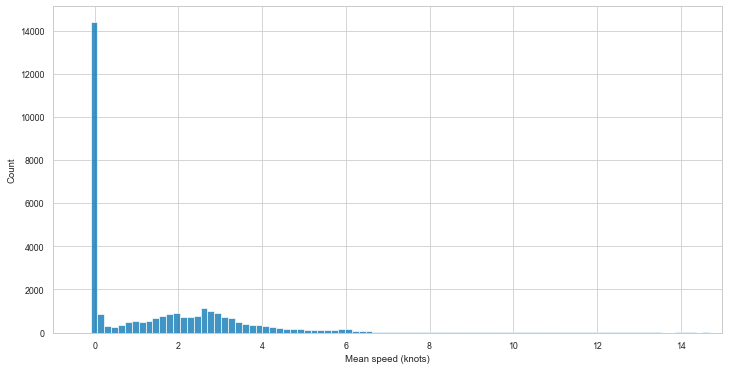

In [3]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

Look into data **after** applying a filter by mean speed (Min Speed = 0.9 Knots):

In [4]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_09_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-07-18 02:54:25,219005929,Fishing,62,3.458709,181.699601,2019-07-18 02:54:25.000000000,2019-07-18 13:04:25.000000000,57.237091,57.125365,57.121652,8.449101,8.594197,8.599272,2019-07-18 07:59:24.999999744,7,Thursday,18,36600,Fishing
2019-07-12 20:14:35,219801000,Fishing,139,2.517871,165.006286,2019-07-12 20:14:35.000000000,2019-07-13 19:14:35.000000000,57.545223,57.577848,57.569926,8.090566,8.174502,8.236405,2019-07-13 07:44:35.000000256,7,Friday,12,82800,Fishing


In [5]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 15521
Number of AIS message updates: 1356299
Number of unique MMSIs: 621

Number of unique MMSIs by ShipType
Fishing    621
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    4.493878
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    15521
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    15521.000000
mean        87.384769
std         35.208367
min         25.000000
25%         59.000000
50%         88.000000
75%        120.000000
max        144.000000
Name: TrackLength, dtype: float64



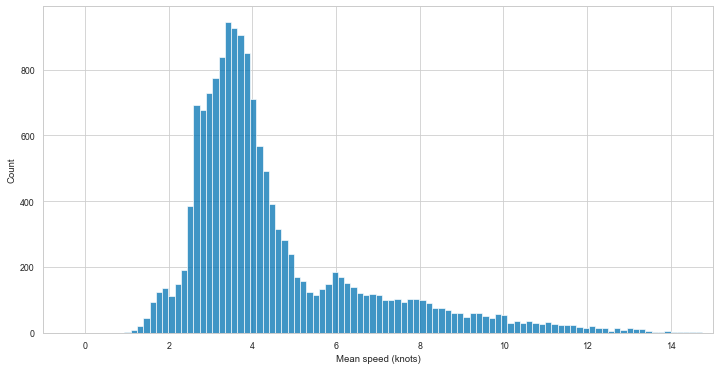

In [6]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

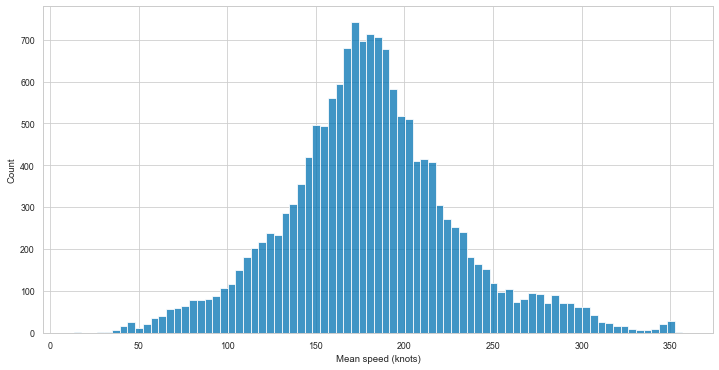

In [7]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanCourse", xlabel="Mean speed (knots)")

Look into data **after** applying a filter by mean speed (Min Speed = 0.8 Knots):

In [8]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_08_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-06-21 14:11:00,220071000,Fishing,46,6.254865,251.337777,2019-06-21 14:11:00.000000000,2019-06-21 21:41:00.000000000,56.757112,56.702441,56.808207,7.669766,8.221405,6.939592,2019-06-21 17:56:00.000000000,6,Friday,21,27000,Fishing
2019-06-06 00:41:26,257396000,Fishing,106,3.374410,134.813746,2019-06-06 00:41:26.000000000,2019-06-06 18:11:26.000000000,58.022094,57.933868,58.111959,9.168595,9.148729,8.459778,2019-06-06 09:26:26.000000512,6,Thursday,6,63000,Fishing


In [9]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 15523
Number of AIS message updates: 1360822
Number of unique MMSIs: 621

Number of unique MMSIs by ShipType
Fishing    621
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    4.471581
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    15523
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    15523.000000
mean        87.664884
std         35.250120
min         25.000000
25%         59.000000
50%         88.000000
75%        120.000000
max        144.000000
Name: TrackLength, dtype: float64



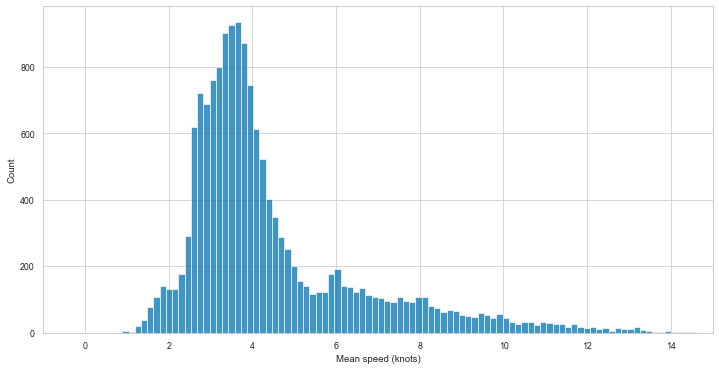

In [10]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

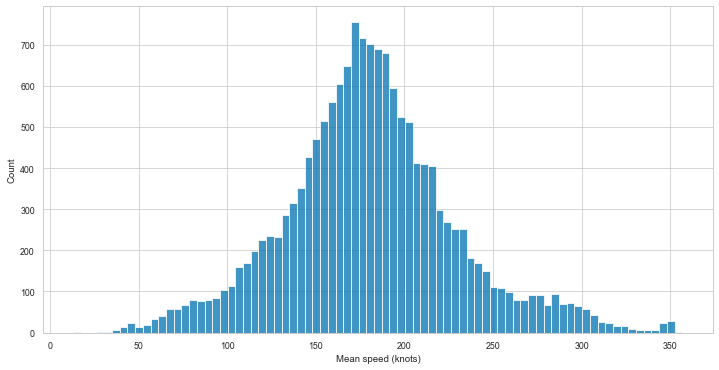

In [11]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanCourse", xlabel="Mean speed (knots)")

Look into data **after** applying a filter by mean speed (Min Speed = 0.7 Knots):

In [12]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_07_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-06-13 16:18:52,219021428,Fishing,85,6.311519,276.386917,2019-06-13 16:18:52.000000000,2019-06-14 06:18:52.000000000,56.645392,56.002161,57.020177,7.334768,8.124448,6.987508,2019-06-13 23:18:52.000000000,6,Thursday,13,50400,Fishing
2019-09-09 14:29:13,220205000,Fishing,106,4.204601,195.799212,2019-09-09 14:29:13.000000000,2019-09-10 07:59:13.000000000,56.324916,55.965161,55.964106,11.866616,11.841466,11.843416,2019-09-09 23:14:13.000000000,9,Monday,9,63000,Fishing


In [13]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 15521
Number of AIS message updates: 1365204
Number of unique MMSIs: 621

Number of unique MMSIs by ShipType
Fishing    621
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    4.447296
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    15521
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    15521.000000
mean        87.958508
std         35.278722
min         25.000000
25%         60.000000
50%         89.000000
75%        120.000000
max        144.000000
Name: TrackLength, dtype: float64



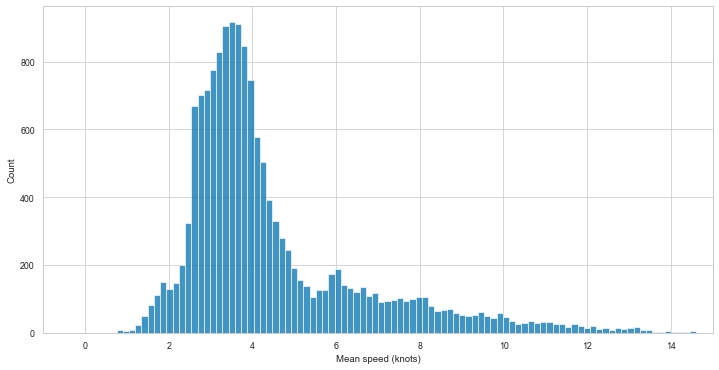

In [14]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

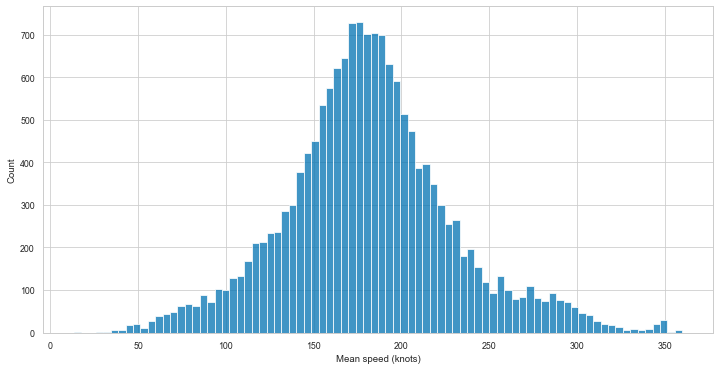

In [38]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanCourse", xlabel="Mean speed (knots)")

Look into data **after** applying a filter by mean speed (Min Speed = 0.6 Knots):

In [40]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_06_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-09-01 14:01:09,219022165,Fishing,25,9.241299,117.881408,2019-09-01 14:01:09.000000000,2019-09-01 18:01:09.000000000,57.259124,57.400178,57.122291,8.107967,7.582293,8.595546,2019-09-01 16:01:09.000000256,9,Sunday,1,14400,Fishing
2019-08-13 01:35:53,266145000,Fishing,138,3.142609,184.450961,2019-08-13 01:35:53.000000000,2019-08-14 00:25:53.000000000,57.669244,57.711270,57.495397,11.519031,11.666058,11.569446,2019-08-13 13:00:52.999999744,8,Tuesday,13,82200,Fishing


In [41]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 15549
Number of AIS message updates: 1370795
Number of unique MMSIs: 622

Number of unique MMSIs by ShipType
Fishing    622
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    4.420304
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    15549
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    15549.000000
mean        88.159689
std         35.311522
min         25.000000
25%         60.000000
50%         89.000000
75%        120.000000
max        144.000000
Name: TrackLength, dtype: float64



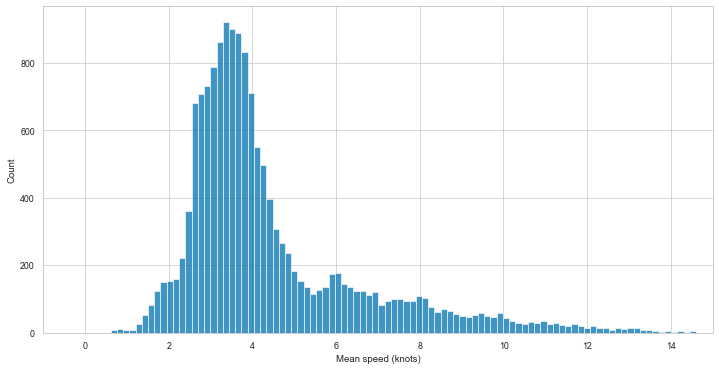

In [42]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

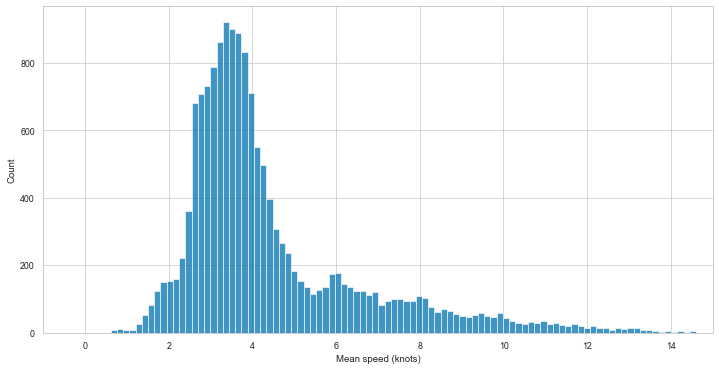

In [43]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

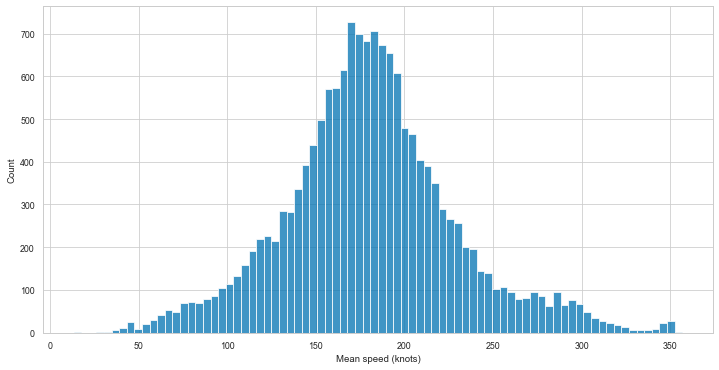

In [44]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanCourse", xlabel="Mean speed (knots)")

Look into data **after** applying a filter by mean speed (Min Speed = 0.5 Knots):

In [16]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_05_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-07-25 02:53:54,257757500,Fishing,54,2.949910,152.408000,2019-07-25 02:53:54.000000000,2019-07-25 11:43:54.000000000,59.024531,59.070935,59.075149,10.695429,10.863995,10.868438,2019-07-25 07:18:54.000000000,7,Thursday,25,31800,Fishing
2019-09-24 06:12:11,220616000,Fishing,126,3.269532,163.606432,2019-09-24 06:12:11.000000000,2019-09-25 03:02:11.000000000,57.807913,57.895923,57.953988,9.908353,9.836696,10.005213,2019-09-24 16:37:11.000000256,9,Tuesday,24,75000,Fishing


In [17]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 15565
Number of AIS message updates: 1376833
Number of unique MMSIs: 622

Number of unique MMSIs by ShipType
Fishing    622
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    4.39191
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    15565
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    15565.000000
mean        88.456987
std         35.379340
min         25.000000
25%         60.000000
50%         90.000000
75%        121.000000
max        144.000000
Name: TrackLength, dtype: float64



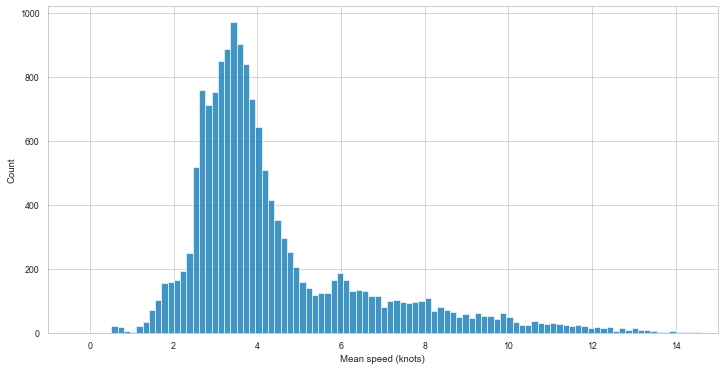

In [18]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

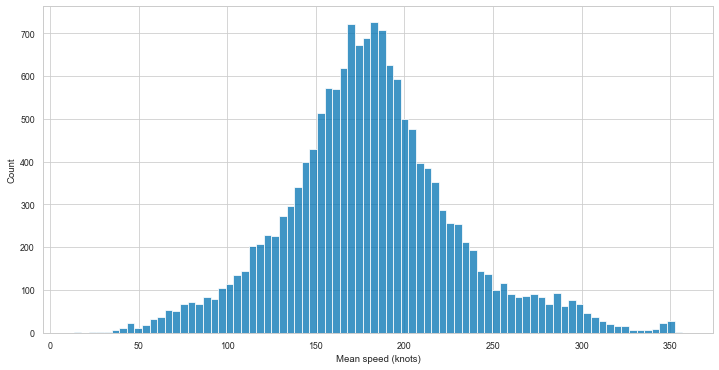

In [19]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanCourse", xlabel="Mean speed (knots)")

Look into data **after** applying a filter by mean speed (Min Speed = 0.4 Knots):

In [33]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_04_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-07-14 11:15:22,257349500,Fishing,74,6.944168,103.602648,2019-07-14 11:15:22.000000000,2019-07-14 23:25:22.000000000,58.285852,58.074539,58.505573,9.449163,8.024190,10.409426,2019-07-14 17:20:22.000000000,7,Sunday,14,43800,Fishing
2019-08-15 01:29:16,266441000,Fishing,43,4.120637,185.286472,2019-08-15 01:29:16.000000000,2019-08-15 08:29:16.000000000,57.776860,57.733096,57.747979,11.443691,11.671526,11.449665,2019-08-15 04:59:16.000000000,8,Thursday,15,25200,Fishing


In [34]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 15648
Number of AIS message updates: 1387287
Number of unique MMSIs: 623

Number of unique MMSIs by ShipType
Fishing    623
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    4.345919
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    15648
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    15648.000000
mean        88.655867
std         35.428031
min         25.000000
25%         61.000000
50%         90.000000
75%        121.000000
max        144.000000
Name: TrackLength, dtype: float64



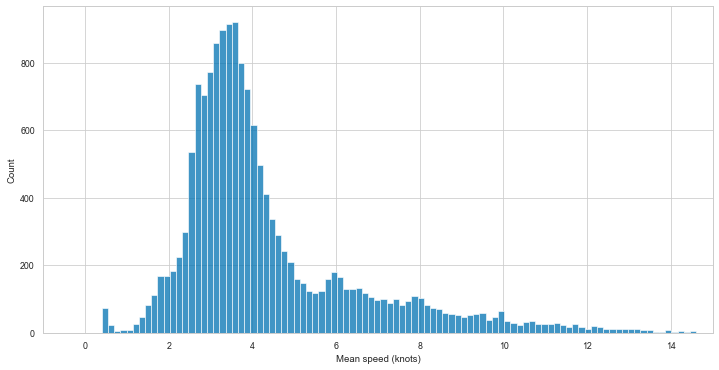

In [35]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

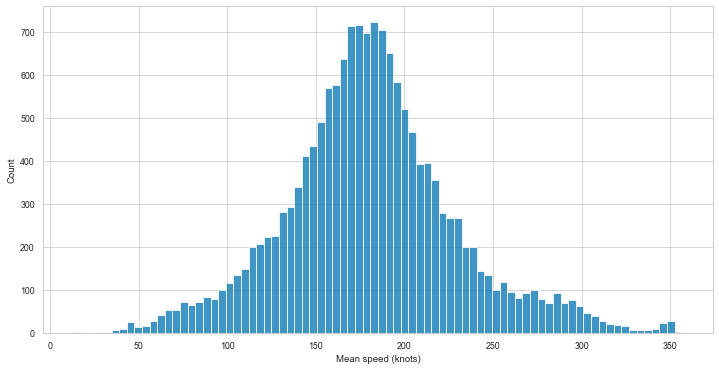

In [36]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanCourse", xlabel="Mean speed (knots)")

Look into data **after** applying a filter by mean speed (Min Speed = 0.3 Knots):

In [37]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_03_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-09-15 11:13:14,219001588,Fishing,105,0.345910,139.158382,2019-09-15 11:13:14.000000000,2019-09-16 04:33:14.000000000,57.592939,57.592951,57.59291,9.964779,9.964763,9.964728,2019-09-15 19:53:13.999999744,9,Sunday,15,62400,Fishing
2019-06-05 08:24:56,219021428,Fishing,134,4.826007,156.294108,2019-06-05 08:24:56.000000000,2019-06-06 06:34:56.000000000,55.958040,55.744559,56.69644,7.774670,7.603154,8.224245,2019-06-05 19:29:56.000000256,6,Wednesday,5,79800,Fishing


In [22]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 15976
Number of AIS message updates: 1419550
Number of unique MMSIs: 625

Number of unique MMSIs by ShipType
Fishing    625
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    4.236045
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    15976
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    15976.000000
mean        88.855158
std         35.518310
min         25.000000
25%         61.000000
50%         90.000000
75%        121.000000
max        144.000000
Name: TrackLength, dtype: float64



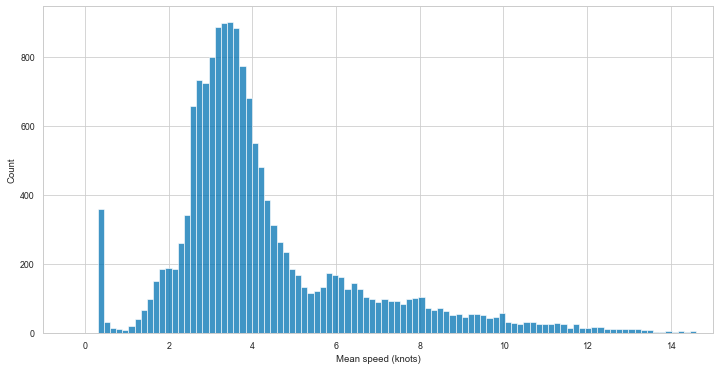

In [23]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

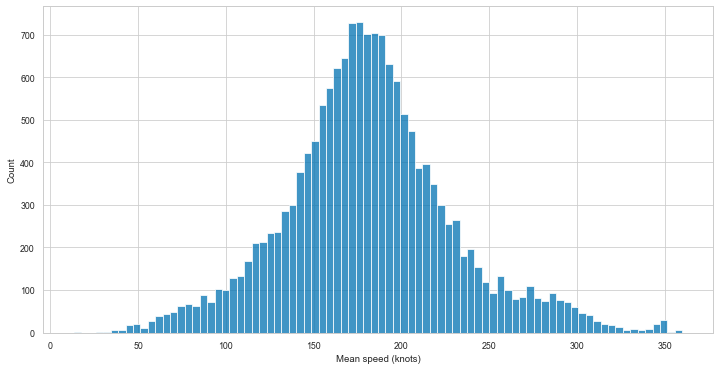

In [24]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanCourse", xlabel="Mean speed (knots)")

Look into data **after** applying a filter by mean speed (Min Speed = 0.2 Knots):

In [26]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_02_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-06-18 06:11:46,266147000,Fishing,116,3.995983,142.310280,2019-06-18 06:11:46.000000000,2019-06-19 01:21:46.000000000,57.370910,57.300890,57.298417,11.479237,11.308665,11.477652,2019-06-18 15:46:45.999999488,6,Tuesday,18,69000,Fishing
2019-08-21 14:39:26,219001604,Fishing,123,3.331242,205.001592,2019-08-21 14:39:26.000000000,2019-08-22 10:59:26.000000000,56.643927,56.133237,56.745119,12.329200,12.308694,12.229967,2019-08-22 00:49:26.000000512,8,Wednesday,21,73200,Fishing


In [27]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 16793
Number of AIS message updates: 1516758
Number of unique MMSIs: 629

Number of unique MMSIs by ShipType
Fishing    629
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    3.995562
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    16793
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    16793.000000
mean        90.320848
std         35.656610
min         25.000000
25%         62.000000
50%         93.000000
75%        123.000000
max        144.000000
Name: TrackLength, dtype: float64



**STILL A LARGE SPIKE IN BEGINNING**

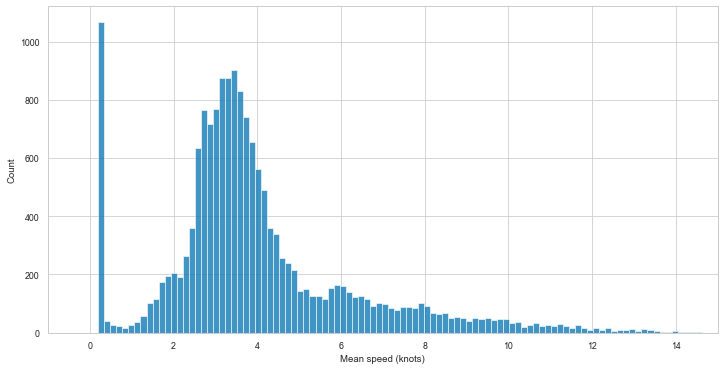

In [28]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

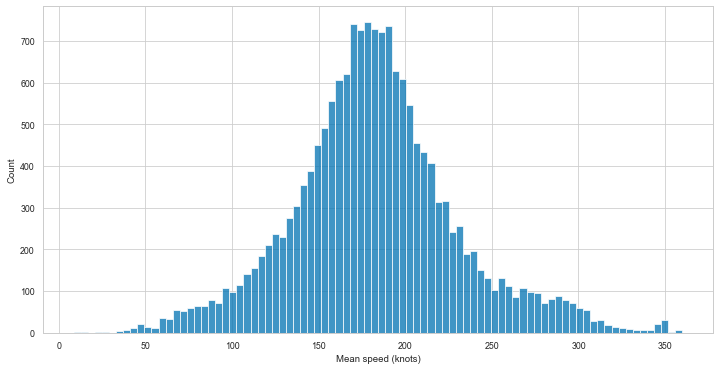

In [29]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanCourse", xlabel="Mean speed (knots)")

Look into data **after** applying a filter by mean speed (Min Speed = 0.1 Knots):

In [30]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_01_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-06-16 15:06:06,257629600,Fishing,72,5.546436,281.858323,2019-06-16 15:06:06.000000000,2019-06-17 02:56:06.000000000,57.858326,57.838629,57.833482,6.910921,7.674148,6.404650,2019-06-16 21:01:06.000000000,6,Sunday,16,42600,Fishing
2019-09-22 00:03:34,220142000,Fishing,114,4.252723,195.803396,2019-09-22 00:03:34.000000000,2019-09-22 18:53:34.000000000,57.877518,57.493579,57.718557,10.438173,10.505416,10.589152,2019-09-22 09:28:34.000000512,9,Sunday,22,67800,Fishing


In [31]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 24547
Number of AIS message updates: 2381079
Number of unique MMSIs: 641

Number of unique MMSIs by ShipType
Fishing    641
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    2.531765
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    24547
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    24547.000000
mean        97.000815
std         36.831599
min         25.000000
25%         68.000000
50%        105.000000
75%        131.000000
max        144.000000
Name: TrackLength, dtype: float64



**STILL A LARGE SPIKE IN BEGINNING**

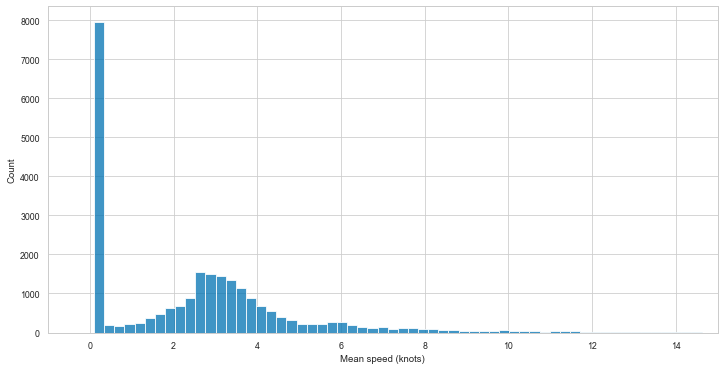

In [32]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])